# Lab 1 - Data Manipulation with Pandas


<div>
<img src="../../images/lab01/pandas_logo.png" width="700"/>
</div>

_(Adapted from [CS109a: Introduction to Data Science](https://harvard-iacs.github.io/2019-CS109A/), [Pandas: Getting Started](https://pandas.pydata.org/docs/getting_started/index.html) & [GitHub: pandas_exercises](https://github.com/guipsamora))_


# 1. Quick Overview


In [146]:
import pandas as pd

from pathlib import Path
from typing import List

# Initialize a base path for us to use
BASE_PATH = Path().cwd()

BASE_PATH

PosixPath('/Users/user/GitHub/Information-Retrieval-Exercises/exercises/lab01-intro-to-pandas')

## How is a DataFrame structured?

<div>
<img src="../../images/lab01/pandas_structure.png" width="700"/>
</div>


Getting started with using pandas


In [147]:
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

df

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


In [148]:
df["Age"]

0    22
1    35
2    58
Name: Age, dtype: int64

When selecting a single column of a pandas **`DataFrame`**, the result is a pandas **`Series`**.


In [149]:
type(df["Age"])

pandas.core.series.Series

A pandas **`Series`** has no column labels, as it is just a single column of a **`DataFrame`**. A Series does have row labels.


In [150]:
# Access the series by the index (row label)
series = df["Age"]

series.loc[series.index % 2 == 0]

0    22
2    58
Name: Age, dtype: int64

## How do we get data inside a DataFrame?

<div>
<img src="../../images/lab01/pandas_read_data.png" width="700"/>
</div>

Pretty simple, just use the (hopefully existing) **`read_<file_extension>`** method:


In [151]:
DATA_PATH = BASE_PATH / "data"

titanic = pd.read_csv(DATA_PATH / "titanic" / "titanic.csv", index_col=0)
titanic

,survived,pclass,name,sex,age,sibSp,parch,ticket,fare,cabin,embarked
passengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


The great thing about this modular approach, is that if we know that the file extension maps one to one to an existing pandas method, then we have nothing to worry about.

_Note: (If we were working with something like `xls` or `xlsx`, which are 'Microsoft Excel Open XML,' we would need map to the according method)_


In [152]:
def load_data(data_path: Path) -> List[pd.DataFrame]:
    """Loads all readable data files from a given directory into pandas DataFrames.

    Args:
        data_path (Path): Path object representing the base directory
            containing the data files.

    Returns:
        List[pd.DataFrame]: A list of pandas DataFrames, one per successfully
            loaded file.
    """
    files_found = [path for path in data_path.glob("*") if path.is_file()]

    result = []
    for found in files_found:
        # Give us the file extension (.<ext>) and then remove the '.' leaving us only with <ext>
        file_extension = found.suffix.lstrip(".")

        read_method = getattr(pd, f"read_{file_extension}")
        if callable(read_method):
            result.append(read_method(found))

    return result

In [153]:
data = load_data(DATA_PATH / "titanic")

print(f"Found: '{len(data)}' DataFrames")
data[2]

Found: '3' DataFrames


,passengerId,survived,pclass,name,sex,age,sibSp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


To check on how pandas interpreted each of the column data types can be done by requesting the pandas **`dtypes`** attribute:


In [154]:
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibSp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

Here, for each of the columns, the used data type is enlisted. The data types in this **`DataFrame`** are integers (**`int64`**), floats (**`float64`**) and strings (**`object`**).

What is the (potential) consequence of **`dtype`** being **`object`** for strings? <br>
$\rightarrow$ Might not be the fastest approach & we also can't simply apply numerical operations

###### _Note:_ (_Starting pandas v3.0 the pyarrow string type will actually be the default string data type, for more see:_ https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#background)


In [155]:
import pandas as pd

n = 1_000_000
series_obj = pd.Series(["hello"] * n, dtype=object) # Numpy ndarray
series_arrow = series_obj.astype("string[pyarrow]") # pyarrow string

print(series_obj.dtype)
print(series_arrow.dtype)

print("\nBenchmarking .str.upper() ...")

print("object dtype:")
%timeit series_obj.str.upper()

print("string[pyarrow] dtype:")
%timeit series_arrow.str.upper()

object
string

Benchmarking .str.upper() ...
object dtype:
74.6 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
string[pyarrow] dtype:
9.31 ms ± 20 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## How can you work with pandas DataFrames?


The Titanic data set consists of the following data columns:

- **`PassengerId`**: Id of every passenger (implicit index of the row).

- **`Survived`**: Indication whether passenger survived. 0 for yes and 1 for no.

- **`Pclass`**: One out of the 3 ticket classes: Class 1, Class 2 and Class 3.

- **`Name`**: Name of passenger.

- **`Sex`**: Gender of passenger.

- **`Age`**: Age of passenger in years.

- **`SibSp`**: Number of siblings or spouses aboard.

- **`Parch`**: Number of parents or children aboard.

- **`Ticket`**: Ticket number of passenger.

- **`Fare`**: Indicating the fare.

- **`Cabin`**: Cabin number of passenger.

- **`Embarked`**: Port of embarkation.


<div>
<img src="../../images/lab01/pandas_columns.png" width="700"/>
</div>


In [156]:
# age_status = titanic[["Age", "Survived"]]

# age_status.head()

Why did this fail? Are we sure we got the columns right?


In [157]:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibSp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

The columns don't match our expected specifications, but we can adjust this easily


In [158]:
# Change the columns to match our specification from above
titanic.columns = titanic.columns.str.capitalize()

age_status = titanic[["Age", "Survived"]]

print(type(age_status))
print(age_status.shape)
age_status.head(10)

<class 'pandas.core.frame.DataFrame'>
(891, 2)


,Age,Survived
passengerId,,
1,22.0,0
2,38.0,1
3,26.0,1
4,35.0,1
5,35.0,0
6,NaN,0
7,54.0,0
8,2.0,0
9,27.0,1


<div>
<img src="../../images/lab01/pandas_rows.png" width="700"/>
</div>


In [159]:
# Let's see how many passengers were on the titanic, who were older than 35 years at that time
above_35 = titanic[titanic["Age"] > 35]
above_35

,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
passengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S


The condition inside the selection brackets **`titanic["Age"] > 35`** checks for which rows the **`Age`** column has a value larger than 35, so:

```py
titanic["Age"] > 35
0      False
1       True
2      False
3      False
4      False
       ...
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool
```

returns a pandas **`Series`** of boolean values, which are either **`True`** or **`False`**, with the same number of rows as the original **`DataFrame`**.


In [160]:
above_35.shape

(217, 11)

<div>
<img src="../../images/lab01/pandas_specify.png" width="700"/>
</div>


Let's say, we are only interested in the names of passengers that were older than 35 years


In [161]:
above_35_names = titanic.loc[titanic["Age"] > 35, "Name"]

In this case, a subset of both rows and columns is made in one go and just using selection brackets **`[]`** is not sufficient anymore. The **`loc`**/**`iloc`** operators are required in front of the selection brackets **`[]`**.

When using **`loc`**/**`iloc`**, the part before the comma is the **rows** you want, and the part after the comma is the **columns** you want to select.

For both the part before and after the comma, you can use a single label, a **list** of labels, a **slice** of labels, a **conditional expression** or a **colon**. Using a colon specifies you want to select all rows or columns.


In [162]:
titanic.iloc[9:25, 2:5]

,Name,Sex,Age
passengerId,,,
10,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0
11,"Sandstrom, Miss Marguerite Rut",female,4.0
12,"Bonnell, Miss Elizabeth",female,58.0
13,"Saundercock, Mr. William Henry",male,20.0
14,"Andersson, Mr. Anders Johan",male,39.0
15,"Vestrom, Miss Hulda Amanda Adolfina",female,14.0
16,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0
17,"Rice, Master Eugene",male,2.0
18,"Williams, Mr. Charles Eugene",male,NaN


When specifically interested in certain rows and/or columns **based on their position** in the table, use the **`iloc`** operator in front of the selection brackets **`[]`**


In [163]:
# Of course you can also mix the ideas of iloc and loc, which makes it easier to avoid accidental column selections
titanic.iloc[0:3, titanic.columns.get_loc("Name")] = "anonymous"

titanic

,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
passengerId,,,,,,,,,,,
1,0,3,anonymous,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,anonymous,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,anonymous,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<div>
<img src="../../images/lab01/pandas_groupby.png" width="700"/>
</div>

What is the average age for male versus female Titanic passengers?


In [164]:
titanic[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.9157088123
male,30.7266445916


Since we are interested in the average age for each gender, we first do a subselection on these two columns(**`titanic[["Sex", "Age"]]`**). Next, we apply the **`groupby()`** method on the **`Sex`** column to create one group per category (and since there are only two values in the column, we will have two groups created). Last, the average each for each category is calculated and returned.

This approach is the general **`split-apply-combine`** pattern:

- **Split** the data into groups
- **Apply** a function to each group independently
- **Combine** the results into a data structure


In [165]:
# Why can't we just apply the groupby operation directly?
# titanic.groupby("Sex").mean()

In [166]:
# Recalling the dtypes, we are applying a numeric operation on types that are incompatible with the operation.
titanic.info()

# We can avoid this by passing `numeric_only=True`
titanic.groupby("Sex").mean(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   Sibsp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Age,Sibsp,Parch,Fare
Sex,,,,,,
female,0.7420382166,2.1592356688,27.9157088123,0.6942675159,0.6496815287,44.4798178344
male,0.1889081456,2.3899480069,30.7266445916,0.4298093588,0.2357019064,25.5238934142


<div>
<img src="../../images/lab01/pandas_count.png" width="700"/>
</div>
What is the number of passengers in each of the cabin classes?


In [167]:
titanic["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

The **`value_counts()`** method counts the number of records for each distinct value in a column. It is a shortcut method, as it is actually a groupby operation in combination with counting of the number of records within each group:

```py
titanic.groupby("Pclass")["Pclass"].count()
Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64
```


# 2. Exercises

Summary of operations & Documentation available at: https://pandas.pydata.org/docs/user_guide/10min.html


### Give the percentage of survivors


In [168]:
titanic["Survived"].mean() * 100

np.float64(38.38383838383838)

### What is the average age and gender of the survivors compared to the people that didn't survive?

**Note**: Pandas does automatically exclude NaN numbers from aggregation functions. If the only value in the column is NaN, then we must take the aggregate value of an empty set, which is results in NaN


In [169]:
titanic.groupby(["Survived", "Sex"])[["Age"]].mean()

Age
Survived Sex                  
0        female  25.0468750000
         male    31.6180555556
1        female  28.8477157360
         male    27.2760215054

### Create a new column, called `AgeGroup`, which classifies the person based on their **`Age`** as follows:

- If 0 < **`Age`** <= 1, then classify them as **`Infant`**
- If 1 < **`Age`** <= 3, then classify them as **`Toddler`**
- If 3 < **`Age`** <= 12, then classify them as **`Child`**
- If 12 < **`Age`** <= 18, then classify them as **`Teen`**
- if 18 < **`Age`** <= 30, then classify them as **`YoungAdult`**
- If 30 < **`Age`** <= 50, then classify them as **`Adult`**
- If 50 < **`Age`** <= 80, then classify them as **`Senior`**
- If 80 < **`Age`** <= 130, then classify them as **`Urgestein`**


In [170]:
titanic["AgeGroup"] = pd.cut(
    titanic["Age"],
    bins=[0, 1, 3, 12, 18, 30, 50, 80, 130],
    labels=["Infant", "Toddler", "Child", "Teen", "YoungAdult", "Adult", "Senior", "Urgestein"],
)

### Now, measure the survival rate by age group


In [171]:
titanic.groupby("AgeGroup")["Survived"].mean()

/var/folders/dh/xcdm9tld6jbcmqr3hlpk5d_m0000gn/T/ipykernel_31526/3432941557.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



AgeGroup
Infant        0.8571428571
Toddler       0.5000000000
Child         0.5128205128
Teen          0.4285714286
YoungAdult    0.3555555556
Adult         0.4232365145
Senior        0.3437500000
Urgestein              NaN
Name: Survived, dtype: float64

## Working with Chipotle


Load the **`chipotle.csv`** from the **`data/chipotle`** directory.

Tip: perhaps some detail in the documentation is necessary to load the file.


In [172]:
chipo_path = DATA_PATH / "chipotle" / "chipotle.csv"

chipo = pd.read_csv(chipo_path, sep="#")

chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Inspect the first 10 entries


In [173]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [174]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### What is the number of columns in the dataset?


In [175]:
chipo.shape[1]

5

### Print the name of all the columns.


In [176]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### How is the dataset indexed?


In [177]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### What were the ten most-ordered items? And how often were they ordered?


In [178]:
c = chipo.groupby("item_name")
c = c.sum()
c = c.sort_values(["quantity"], ascending=False)
c.head(10)

# Chicken Bowl: 761, ...

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...
Chicken Burrito,497303,591,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49 $8.49 $10.98 $8.49 $10.98 $10.98 $8.75 $...
Chips and Guacamole,449959,506,0,$4.45 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $3.9...
Steak Burrito,328437,386,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75 $9.25 $8.99 $11.75 $8.99 $8.99 $8.99 $8...
Canned Soft Drink,304753,351,[Coke][Sprite][Coke][Coke][Lemonade][Sprite][D...,$1.25 $1.25 $1.25 $1.25 $1.25 $1.25 $1.25 $1.2...
Chips,208004,230,0,$2.15 $2.15 $2.15 $2.15 $2.15 $2.15 $4.30 $2.1...
Steak Bowl,193752,221,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.99 $8.99 $11.75 $11.75 $8.99 $11.48 $9.25 $...
Bottled Water,175944,211,0,$1.09 $1.09 $1.09 $1.50 $1.50 $1.50 $3.00 $1.5...
Chips and Fresh Tomato Salsa,100419,130,0,$2.39 $2.39 $2.39 $2.95 $2.95 $2.95 $2.95 $2.3...


### How many items were ordered in total?


In [179]:
total_items_orders = chipo.quantity.sum()
total_items_orders

np.int64(4972)

### How much was the revenue for the period in the dataset?

Tip: if you are running into issues, check the type of the column(s) that you need to work with. Perhaps you need preprocessing before proceeding with some steps


In [180]:
chipo.item_price = chipo.item_price.str.replace("$", "").astype(float)

In [181]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [182]:
revenue = (chipo["quantity"] * chipo["item_price"]).sum()

print("Revenue was: $" + str(round(revenue, 2)))

# Solution: Revenue was: $39237.02

Revenue was: $39237.02


### How many orders were made in the period?


In [183]:
orders = chipo.order_id.value_counts()
orders

order_id
926     23
1483    14
205     12
759     11
1786    11
        ..
768      1
341      1
1048     1
94       1
1199     1
Name: count, Length: 1834, dtype: int64

### What is the lowest, average, and highest revenue per order?


In [ ]:
chipo["revenue"] = chipo["quantity"] * chipo["item_price"]
chipo.groupby("order_id")["revenue"].sum().agg(["min", "max", "median", "mean"])

# Solution: mean: 21.394...; min: 10.08; max: 1074.24; median: 16.65

min         10.0800000000
max       1074.2400000000
median      16.6500000000
mean        21.3942311887
Name: revenue, dtype: float64

### How many different items are sold?


In [185]:
chipo.item_name.value_counts().count()

# Solution: 50

np.int64(50)

### How many products cost more than $10.00 ?

Tip: Inspect the item_price column for a specific item to see how the price and item_name relate to each other.


In [186]:
chipo["product_price"] = chipo.item_price / chipo.quantity

In [187]:
# item_name and choice_description appear is pairs multiple times, so we must drop them to avoid falsifying our results
filtered_chipo = chipo.drop_duplicates(subset=["choice_description", "item_name"])

filtered_chipo.loc[filtered_chipo.product_price > 10].reset_index(drop=True)

# Solution: 707 rows

,order_id,quantity,item_name,choice_description,item_price,revenue,product_price
0,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98,10.98
1,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75,11.75
2,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25,11.25
3,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98,10.98,10.98
4,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75,11.75,11.75
...,...,...,...,...,...,...,...
702,1825,1,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Rice, Sour Cream, ...",11.75,11.75,11.75
703,1825,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Pinto Beans, Sour ...",11.75,11.75,11.75
704,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",11.75,11.75,11.75
705,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75,11.75


### How many different product prices exist?


In [188]:
chipo.value_counts("product_price").count()

# Solution: 37

np.int64(37)

### What is the quantity of the most expensive **item** ordered?


In [189]:
chipo.loc[[chipo["item_price"].idxmax()]]

,order_id,quantity,item_name,choice_description,item_price,revenue,product_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75,2.95


### How many times did someone order more than one Canned Soda?


In [190]:
canned_soda = chipo["item_name"] == "Canned Soda"
more_than_one = chipo["quantity"] > 1

chipo.loc[canned_soda & more_than_one]

,order_id,quantity,item_name,choice_description,item_price,revenue,product_price
18,9,2,Canned Soda,[Sprite],2.18,4.36,1.09
51,23,2,Canned Soda,[Mountain Dew],2.18,4.36,1.09
162,73,2,Canned Soda,[Diet Coke],2.18,4.36,1.09
171,76,2,Canned Soda,[Diet Dr. Pepper],2.18,4.36,1.09
350,150,2,Canned Soda,[Diet Coke],2.18,4.36,1.09
352,151,2,Canned Soda,[Coca Cola],2.18,4.36,1.09
698,287,2,Canned Soda,[Coca Cola],2.18,4.36,1.09
700,288,2,Canned Soda,[Coca Cola],2.18,4.36,1.09
909,376,2,Canned Soda,[Mountain Dew],2.18,4.36,1.09
1091,450,2,Canned Soda,[Dr. Pepper],2.18,4.36,1.09


### List the full order of the person that wanted the most canned sodas.


In [191]:
# First we find take the row with the most cans ordered
most_cans_order = chipo.loc[canned_soda & more_than_one]["quantity"].idxmax()
print(most_cans_order)

# Then we extract the order_id, the important fact here is that integers are interpreted as LABEL of the index
order_id = chipo.loc[most_cans_order, "order_id"]

chipo[chipo["order_id"] == order_id]

2235


,order_id,quantity,item_name,choice_description,item_price,revenue,product_price
2235,901,4,Canned Soda,[Sprite],4.36,17.44,1.09
2236,901,1,Steak Burrito,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",11.48,11.48,11.48
2237,901,1,Steak Burrito,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99,8.99,8.99
2238,901,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Rice, Fajita Vegg...",8.49,8.49,8.49


### (Advanced): Create a profitability report about the menu, which includes for each item:

- Total quantity sold
- Total revenue generated
- Number of **unique** orders containing the item
- Average selling price per unit

At the end, rank the items by their revenue contribution (% of total revenue)


In [192]:
report = (
    chipo.groupby("item_name")
    .agg(quantity=("quantity", "sum"), total_rev=("revenue", "sum"), orders=("order_id", "nunique"))
    .assign(avg_selling_price_per_order=lambda x: x["total_rev"] / x["quantity"])
    .assign(revenue_share=lambda x: 100 * x["total_rev"] / x["total_rev"].sum())
    .sort_values("total_rev", ascending=False)
)

report

,quantity,total_rev,orders,avg_selling_price_per_order,revenue_share
item_name,,,,,
Chicken Bowl,761,8044.63,615,10.5711300920,20.5026528518
Chicken Burrito,591,6387.06,489,10.8072081218,16.2781475250
Steak Burrito,386,4236.13,342,10.9744300518,10.7962582276
Steak Bowl,221,2479.81,188,11.2208597285,6.3200773147
Chips and Guacamole,506,2475.62,474,4.8925296443,6.3093986241
Chicken Salad Bowl,123,1506.25,98,12.2459349593,3.8388491277
Chicken Soft Tacos,120,1199.01,107,9.9917500000,3.0558131071
Chips and Fresh Tomato Salsa,130,1033.96,110,7.9535384615,2.6351644442
Veggie Burrito,97,1002.27,91,10.3326804124,2.5543988815


### Bonus: We can plot the data with pure pandas as well!


<Axes: title={'center': 'Revenue Share by Item'}>

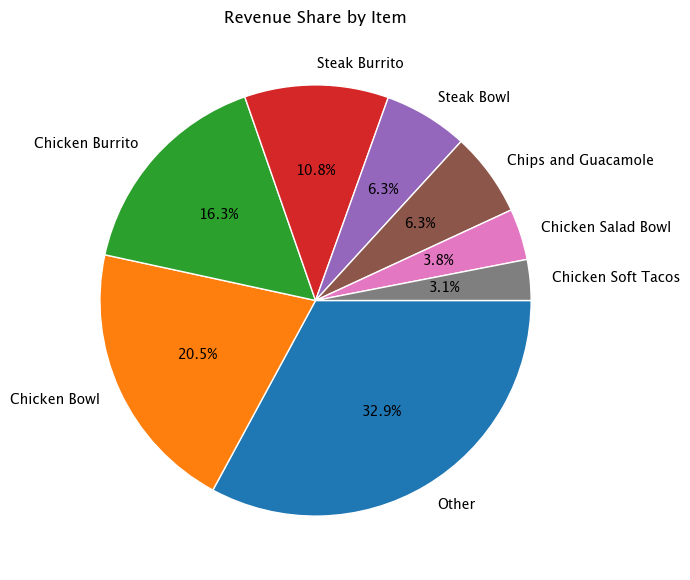

In [ ]:
threshold = 3
report_grouped = (
    report.assign(group=lambda x: x.index.where(x["revenue_share"] >= threshold, "Other"))
    .groupby("group", as_index=True)
    .agg({"quantity": "sum", "total_rev": "sum", "orders": "sum", "revenue_share": "sum"})
    .sort_values("revenue_share", ascending=False)
)


report_grouped["revenue_share"].plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Revenue Share by Item",
    figsize=(7, 7),
    legend=False,
    ylabel="",
    wedgeprops={"edgecolor": "white"},
    labels=report_grouped.index,
    counterclock=False,
)

### If we want to be a bit more fancy, it also works to use matplotlib


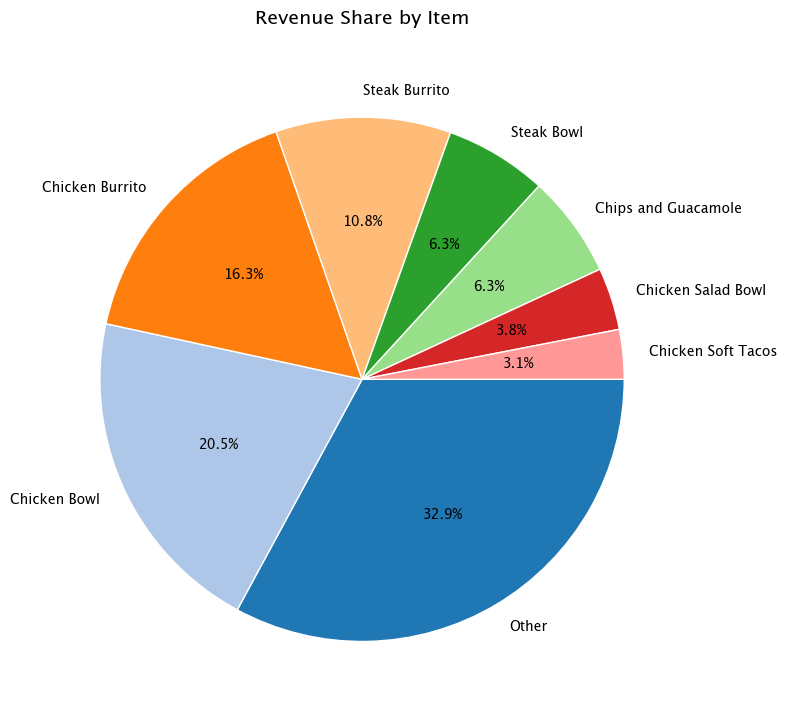

In [227]:
import matplotlib.pyplot as plt
import pandas as pd

# Group all items with revenue_share < 7% into "Other"
threshold = 3
small = report[report["revenue_share"] < threshold]
large = report[report["revenue_share"] >= threshold]

# Create the "Other" row
other = pd.DataFrame(
    {
        "quantity": [small["quantity"].sum()],
        "total_rev": [small["total_rev"].sum()],
        "orders": [small["orders"].sum()],
        "avg_selling_price_per_order": [small["total_rev"].sum() / small["quantity"].sum()],
        "revenue_share": [small["revenue_share"].sum()],
    },
    index=["Other"],
)

# Combine them
report_grouped = pd.concat([large, other]).sort_values("revenue_share", ascending=False)

# --- Pretty pie chart ---
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.tab20.colors  # nice qualitative palette
wedges, texts, autotexts = ax.pie(
    report_grouped["revenue_share"],
    labels=report_grouped.index,
    autopct=lambda p: f"{p:.1f}%" if p >= 3 else "",  # hide very small labels
    counterclock=False,
    colors=colors,
    wedgeprops={"edgecolor": "white"},
    textprops={"fontsize": 10},
)

# Title and formatting
ax.set_title("Revenue Share by Item", fontsize=14, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

### (Advanced): Are there price inconsistencies, if so, list them.

Background: Some items on our menu may have been sold at different prices, e.g. depending on add-ons. Find all items that have more than one unique price and list their price ranges.


In [195]:
price_variants = (
    chipo.groupby("item_name")["product_price"]
    .agg(["nunique", "min", "mean", "median", "max"])
    .query("nunique > 1")
    .sort_values("nunique", ascending=False)
)

price_variants

,nunique,min,mean,median,max
item_name,,,,,
Chicken Bowl,8,8.19,9.6577272727,8.75,11.25
Barbacoa Bowl,6,8.69,10.1872727273,9.25,11.75
Steak Burrito,6,8.69,9.9934239130,9.25,11.75
Barbacoa Burrito,6,8.69,9.8324175824,9.25,11.75
Chicken Burrito,6,8.19,9.4759493671,8.75,11.25
Carnitas Burrito,6,8.69,9.9759322034,9.25,11.75
Steak Bowl,6,8.69,10.2325592417,9.25,11.75
Chips and Guacamole,5,3.89,4.3456158664,4.45,4.45
Carnitas Bowl,5,8.99,10.3155882353,9.25,11.75
